In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
# plt.style.use('seaborn')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv("time_series_covid-19_confirmed.csv")
print(confirmed_cases.shape)
confirmed_cases.head()

(450, 58)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [3]:
death_cases = pd.read_csv("time_series_covid-19_deaths.csv")
print(death_cases.shape)
death_cases.head()

(450, 58)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
recovered_cases = pd.read_csv("time_series_covid-19_recovered.csv")
print(recovered_cases.shape)
recovered_cases.head()

(450, 58)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [5]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [6]:
# Extracting only the dates columns that have information of confirmed, deaths and recovered cases
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = death_cases.loc[:, cols[4]:cols[-1]]
recovered = recovered_cases.loc[:, cols[4]:cols[-1]]

In [7]:
# Check the head of the outbreak cases
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [8]:
# Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 empty lists
# Also, calculate the total mortality rate which is the death_sum/confirmed cases

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [9]:
print(confirmed_sum)
print(death_sum)
print(recovered_sum)

167449
6440
76034


In [10]:
# Convert all the dates and the cases in the form of a numpy array

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [11]:
# Future forecasting for the next 10 days

days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

In [12]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forecast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [13]:
# For visualization with the latest data of 15th of march

latest_confirmed = confirmed[dates[-1]]
latest_deaths = deaths[dates[-1]]
latest_recoveries = recovered[dates[-1]]

In [14]:
# Find the list of unique countries

unique_countries =  list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [15]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [16]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81003 cases
Italy: 24747 cases
Iran: 13938 cases
Korea, South: 8162 cases
Spain: 7798 cases
Germany: 5795 cases
France: 4513 cases
US: 3499 cases
Switzerland: 2200 cases
Norway: 1221 cases
United Kingdom: 1144 cases
Netherlands: 1135 cases
Sweden: 1022 cases
Belgium: 886 cases
Denmark: 875 cases
Austria: 860 cases
Japan: 839 cases
Cruise Ship: 696 cases
Malaysia: 428 cases
Qatar: 401 cases
Greece: 331 cases
Australia: 297 cases
Czechia: 253 cases
Canada: 252 cases
Israel: 251 cases
Portugal: 245 cases
Finland: 244 cases
Singapore: 226 cases
Slovenia: 219 cases
Bahrain: 214 cases
Estonia: 171 cases
Iceland: 171 cases
Brazil: 162 cases
Philippines: 140 cases
Romania: 131 cases
Ireland: 129 cases
Poland: 119 cases
Indonesia: 117 cases
Iraq: 116 cases
Thailand: 114 cases
India: 113 cases
Kuwait: 112 cases
Egypt: 110 cases
Lebanon: 110 cases
Saudi Arabia: 103 cases
San Marino: 101 cases
United Arab Emirates: 98 cases
Chile: 74 cases
Russia: 63 ca

In [17]:
# Find the list of unique provinces

unique_provinces =  list(confirmed_cases['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [18]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)

In [19]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 73 cases
New South Wales: 134 cases
Victoria: 57 cases
Queensland: 61 cases
South Australia: 20 cases
Western Australia: 17 cases
Tasmania: 6 cases
Northern Territory: 1 cases
Ontario: 104 cases
Alberta: 39 cases
Quebec: 24 cases
Washington: 643 cases
New York: 732 cases
California: 426 cases
Massachusetts: 164 cases
Diamond Princess: 742 cases
Grand Princess: 23 cases
Georgia: 99 cases
Colorado: 131 cases
Florida: 115 cases
New Jersey: 98 cases
Oregon: 36 cases
Texas: 72 cases
Illinois: 93 cases
Pennsylvania: 66 cases
Iowa: 18 cases
Maryland: 32 cases
North Carolina: 33 cases
South Carolina: 28 cases
Tennessee: 39 cases
Virginia: 45 cases
Arizona: 13 cases
Indiana: 20 cases
Kentucky: 20 cases
District of Columbia: 16 cases
Nevada: 24 cases
New Hampshire: 13 cases
Minnesota: 35 cases
Nebraska: 17 cases
Ohio: 37 cases
Rhode Island: 20 cases
Wisconsin: 32 cases
Connecticut: 24 cases
Hawaii: 6 cases
Oklahoma: 7 cases
Utah: 28 cases
Kansas: 8 cases
Louisiana: 91 cases
Mis

In [20]:
# handling nan values if there is any

nan_indices = []


for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

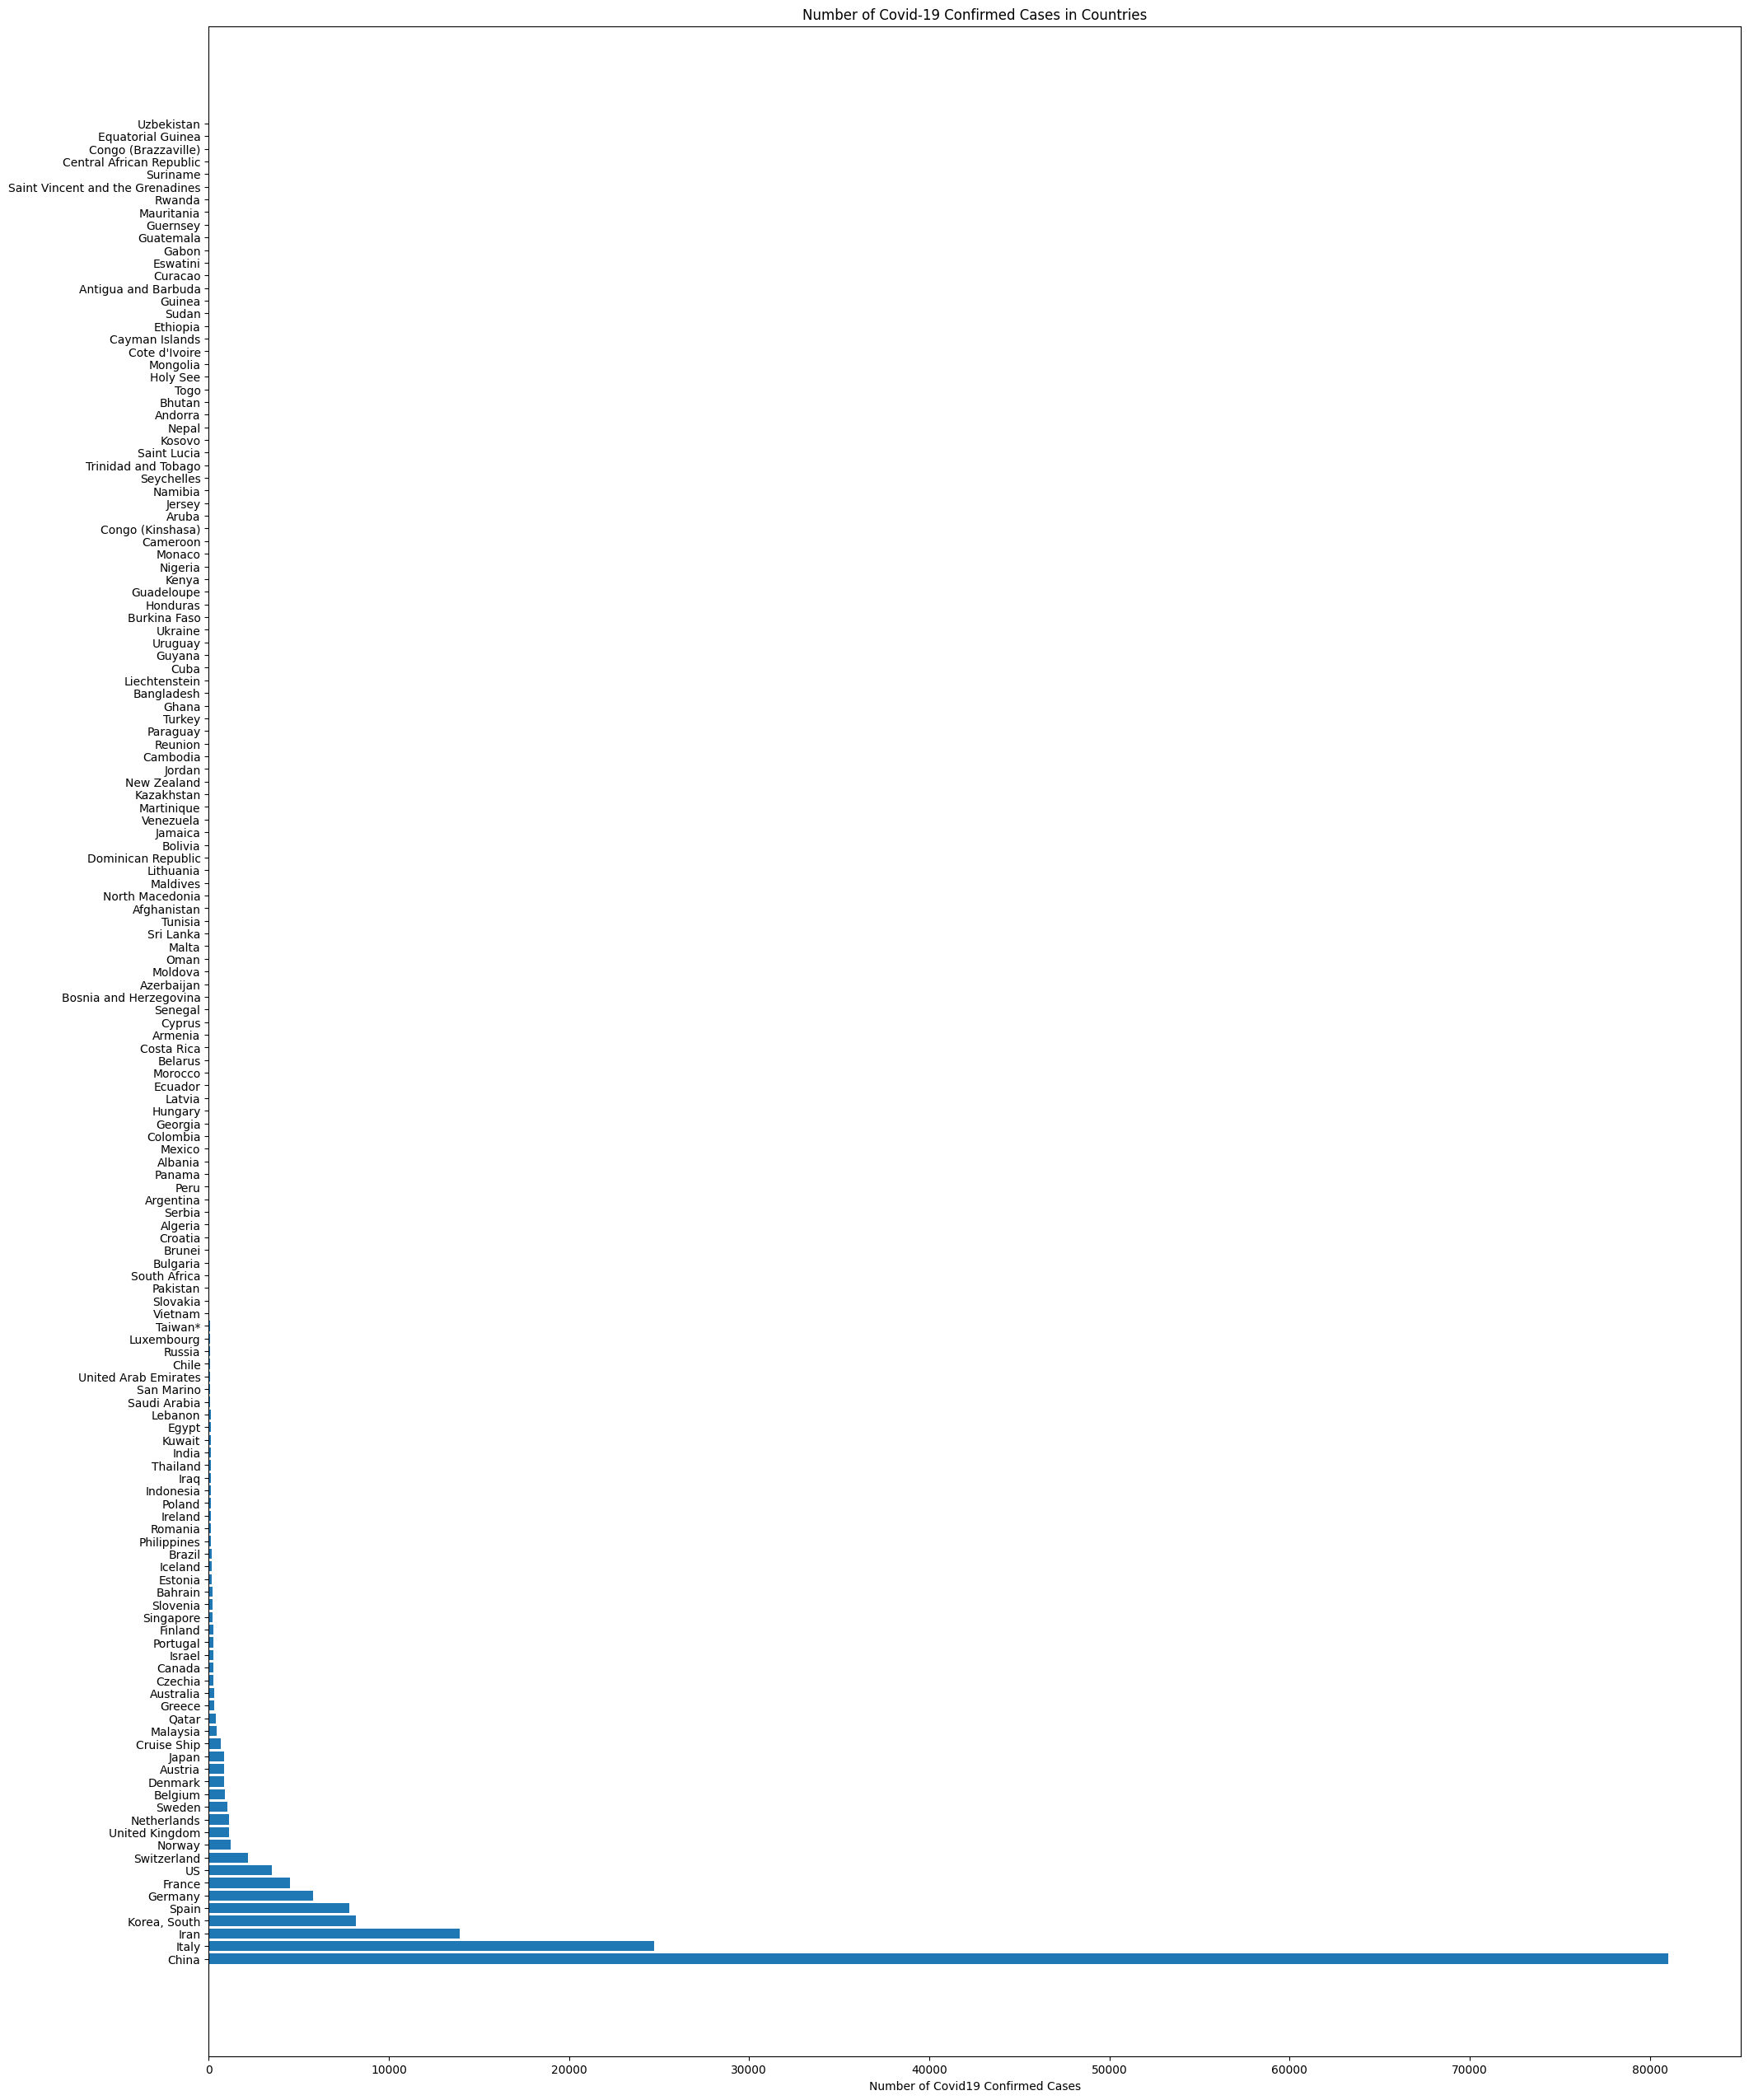

In [21]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(24, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [22]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

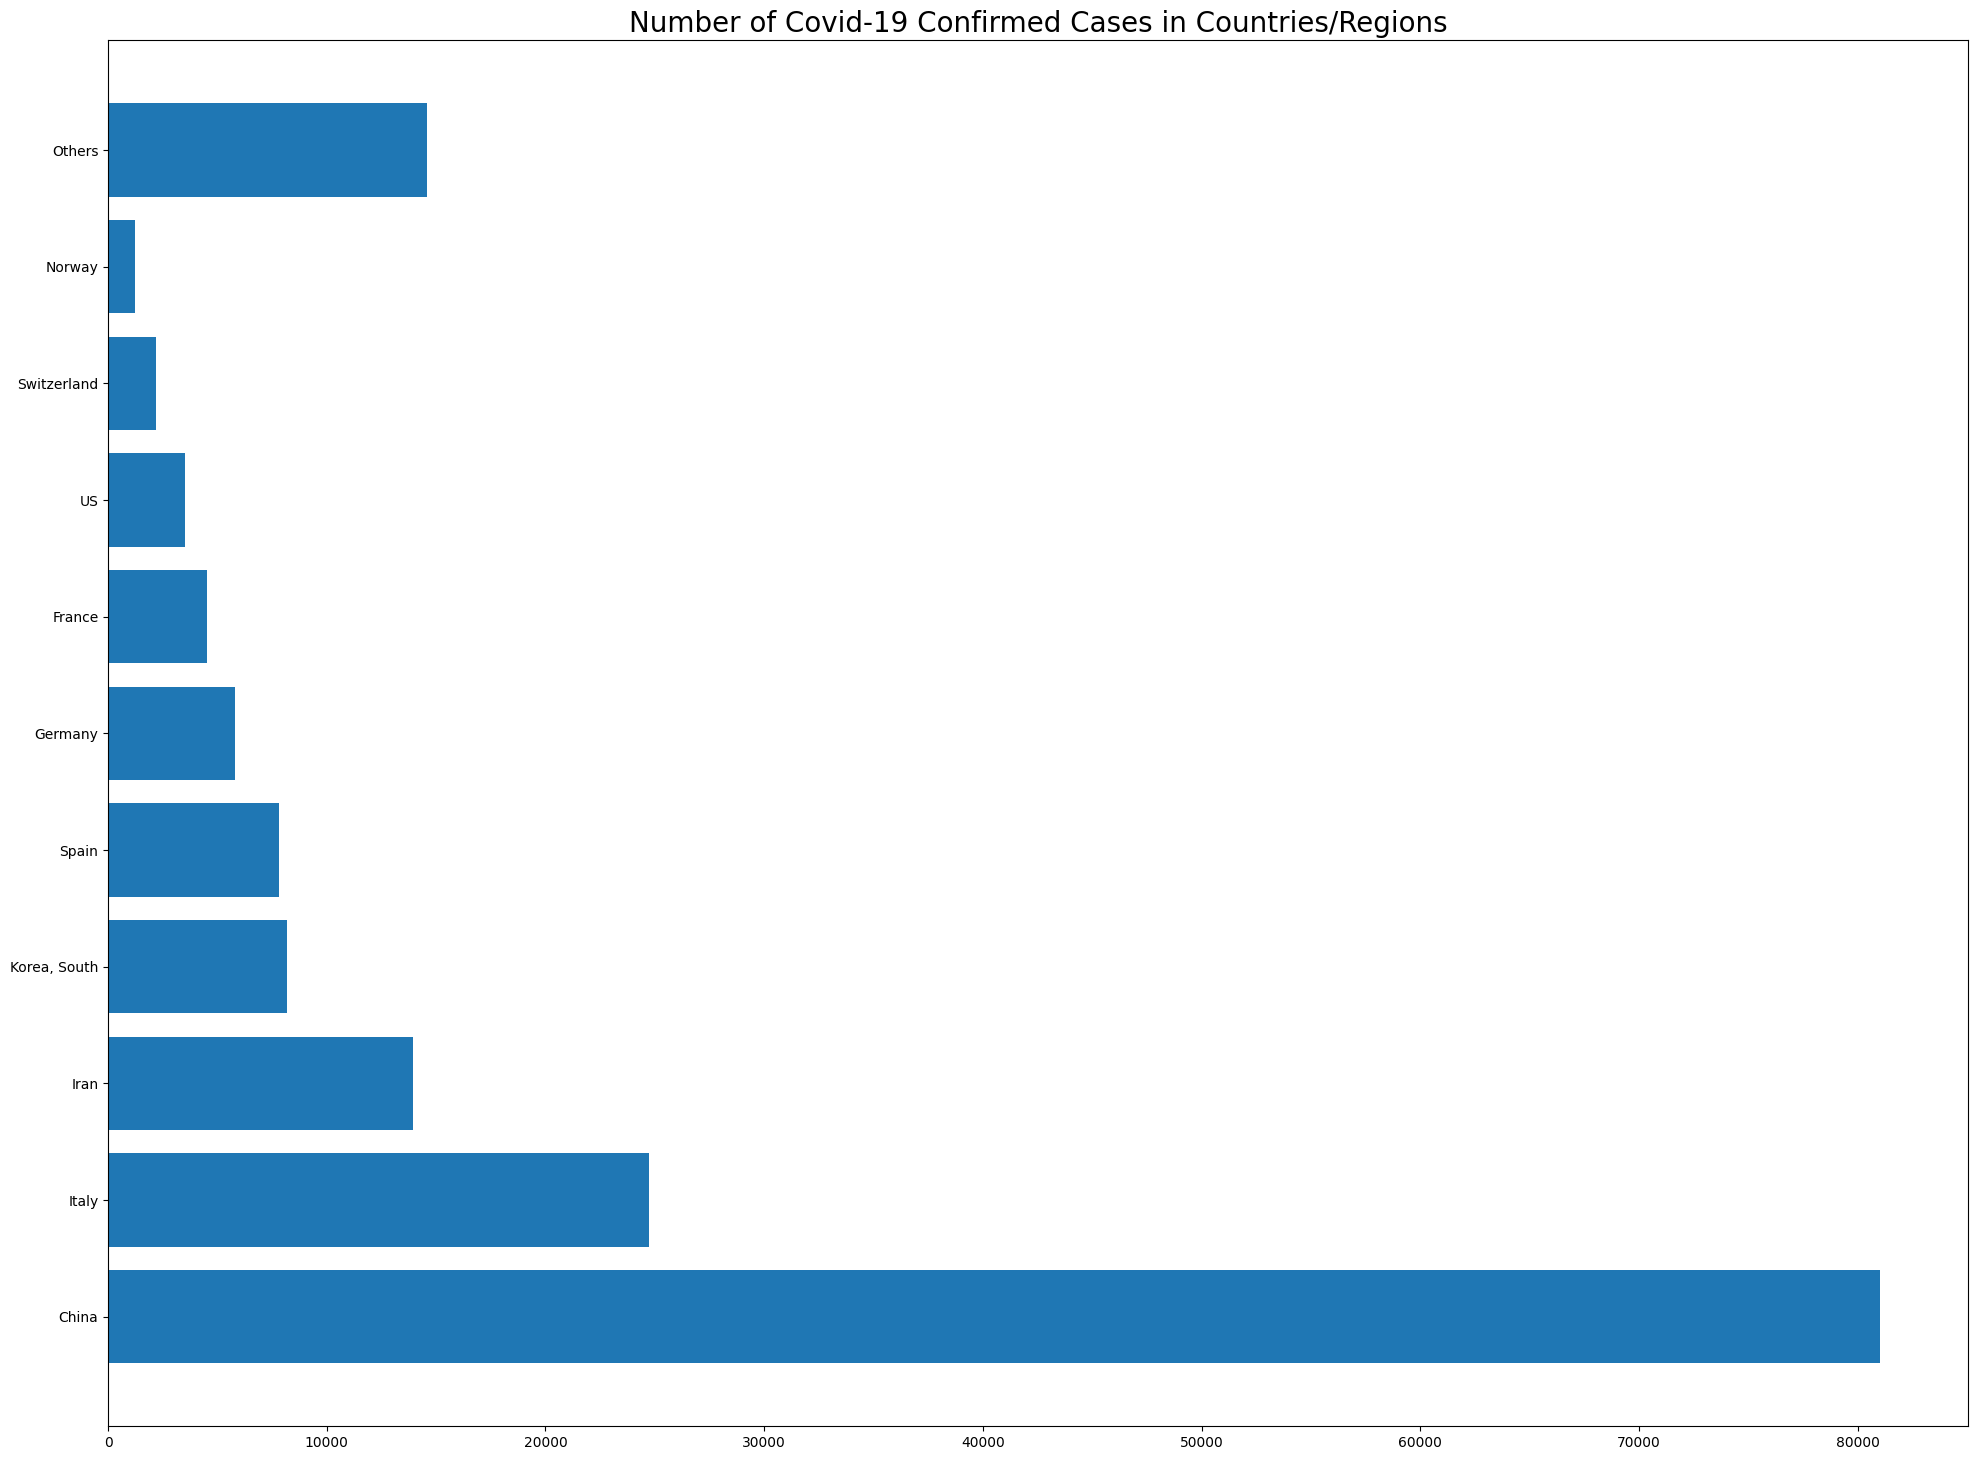

In [23]:
# Visualize the 10 countries

plt.figure(figsize=(24, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

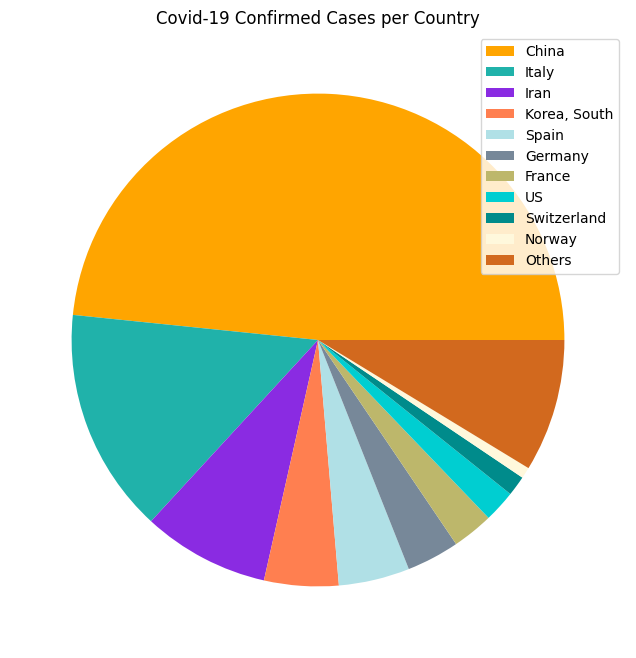

In [24]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(8,8))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [25]:
deaths = deaths.values.ravel()
confirmed=confirmed.values.ravel()
deaths=deaths.reshape(-1,1)
confirmed=confirmed.reshape(-1,1)

In [26]:
X_train_confirmed,X_test,y_train_confirmed,y_test=train_test_split(confirmed,deaths,test_size=0.2)
print(y_train_confirmed)
# Building the SVM model

kernel = ['rbf']
c = [1]
gamma = ['auto']
epsilon = [1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)

svm_search.fit(X_train_confirmed, y_train_confirmed)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=40. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [1], 'epsilon': [1],
                                        'gamma': ['auto'], 'kernel': ['rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [27]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 1, 'C': 1}

In [28]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [29]:
svm_confirmed

SVR(C=1, epsilon=1, gamma='auto')

In [30]:
svm_pred

array([0.99973697, 1.00033504, 1.00005432, 1.00038238, 0.99983563,
       1.00043808, 1.00024305, 1.00001039, 1.00050477, 1.00003331,
       1.00030893, 0.99992474, 0.99992474, 0.99980547, 1.00038348,
       1.00000683, 1.00049484, 1.00002625, 1.00015679, 0.99994283,
       1.0004531 , 0.99972015, 0.99972969, 0.99985648, 1.00003463,
       1.00049461, 0.99981545, 1.00000515, 0.99986621, 0.99952934,
       0.99973881, 1.00000898, 0.99977388, 0.99996167, 0.99989368,
       0.9998816 , 1.00035096, 1.99957513, 1.00047659, 0.99965189,
       1.00030882, 0.99983756, 1.00001754, 0.99982067, 1.00040906,
       1.00000515, 1.00018675, 0.99960768, 1.00000698, 0.99983044,
       1.00048894, 0.99980025, 0.99999102, 0.99955452, 0.99993346,
       0.99973191, 1.00022401, 0.99999793, 1.0000578 , 0.99963923,
       1.00022307, 1.00000603, 1.00022739, 0.99980057])

MAE: 7.252864939309957
MSE: 14444.162647957708


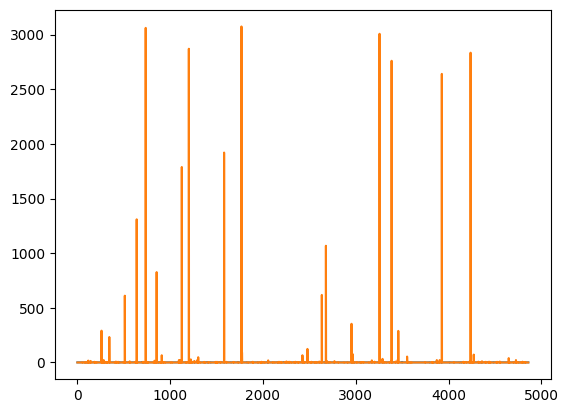

In [31]:
# check against testing data

svm_test_pred = svm_confirmed.predict(X_test)
plt.plot(svm_test_pred)
plt.plot(y_test)
print('MAE:', mean_absolute_error(svm_test_pred, y_test))
print('MSE:',mean_squared_error(svm_test_pred, y_test))

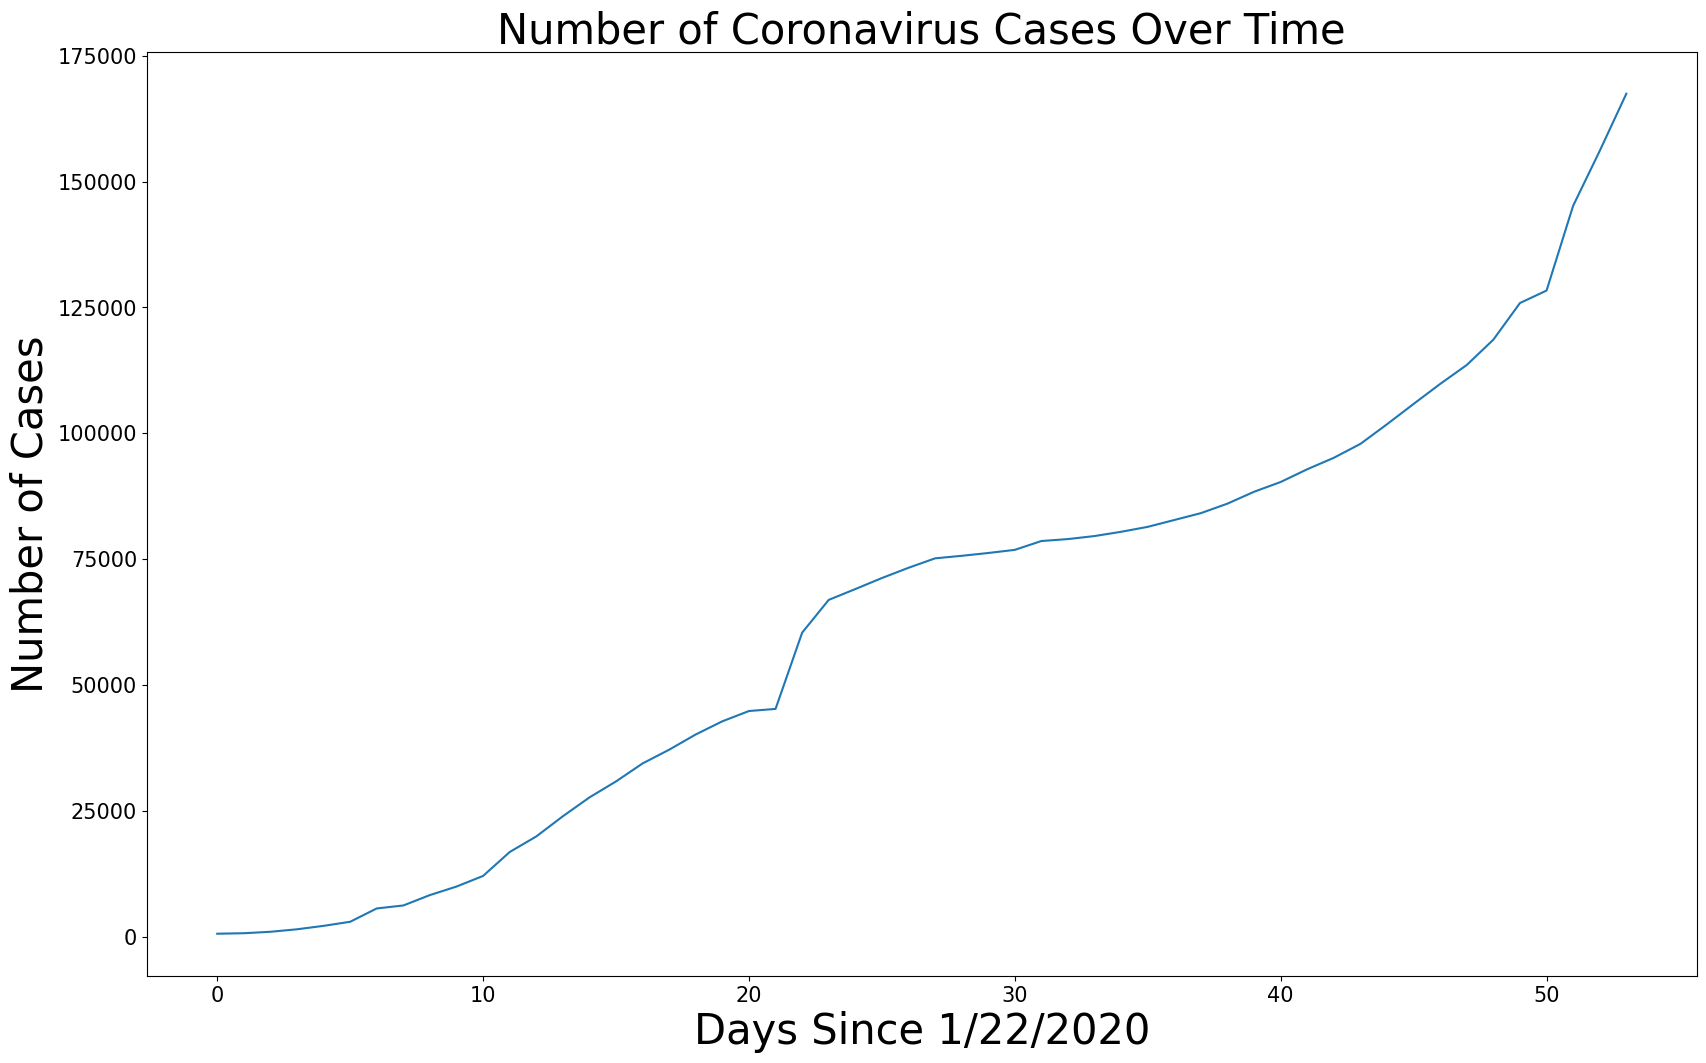

In [32]:
# Total Number of coronavirus cases over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

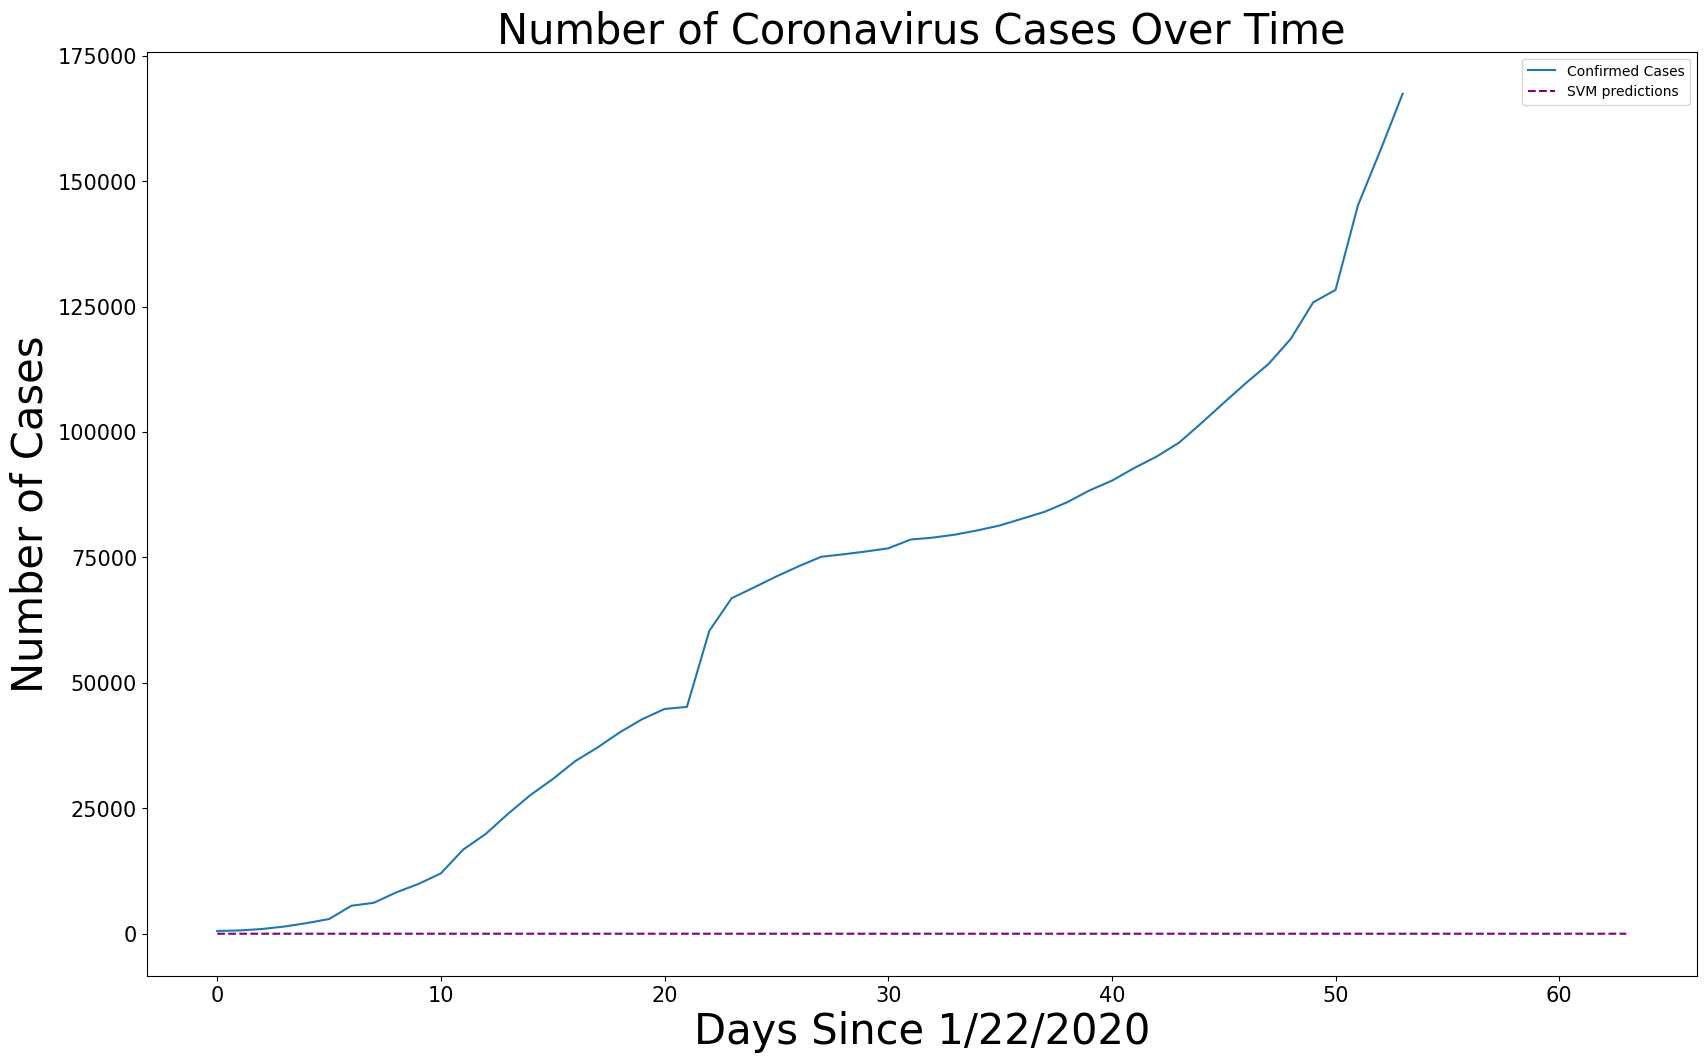

In [33]:
# Confirmed vs Predicted cases

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [34]:
# Predictions for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('03/16/2020', 0.9999334627951522),
 ('03/17/2020', 0.9997319124164701),
 ('03/18/2020', 1.0002240108834057),
 ('03/19/2020', 0.9999979262927898),
 ('03/20/2020', 1.0000577980906402),
 ('03/21/2020', 0.9996392258300706),
 ('03/22/2020', 1.0002230699581802),
 ('03/23/2020', 1.0000060319538695),
 ('03/24/2020', 1.0002273852727326),
 ('03/25/2020', 0.9998005716604217)}

In [35]:
# Using Linear regression model to make predictions

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test))
print('MSE:',mean_squared_error(test_linear_pred, y_test))

MAE: 2.8925141878306464
MSE: 421.36658825873235


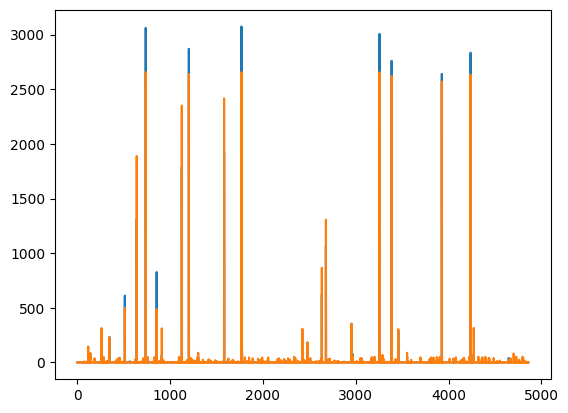

In [36]:
plt.plot(y_test)
plt.plot(test_linear_pred)

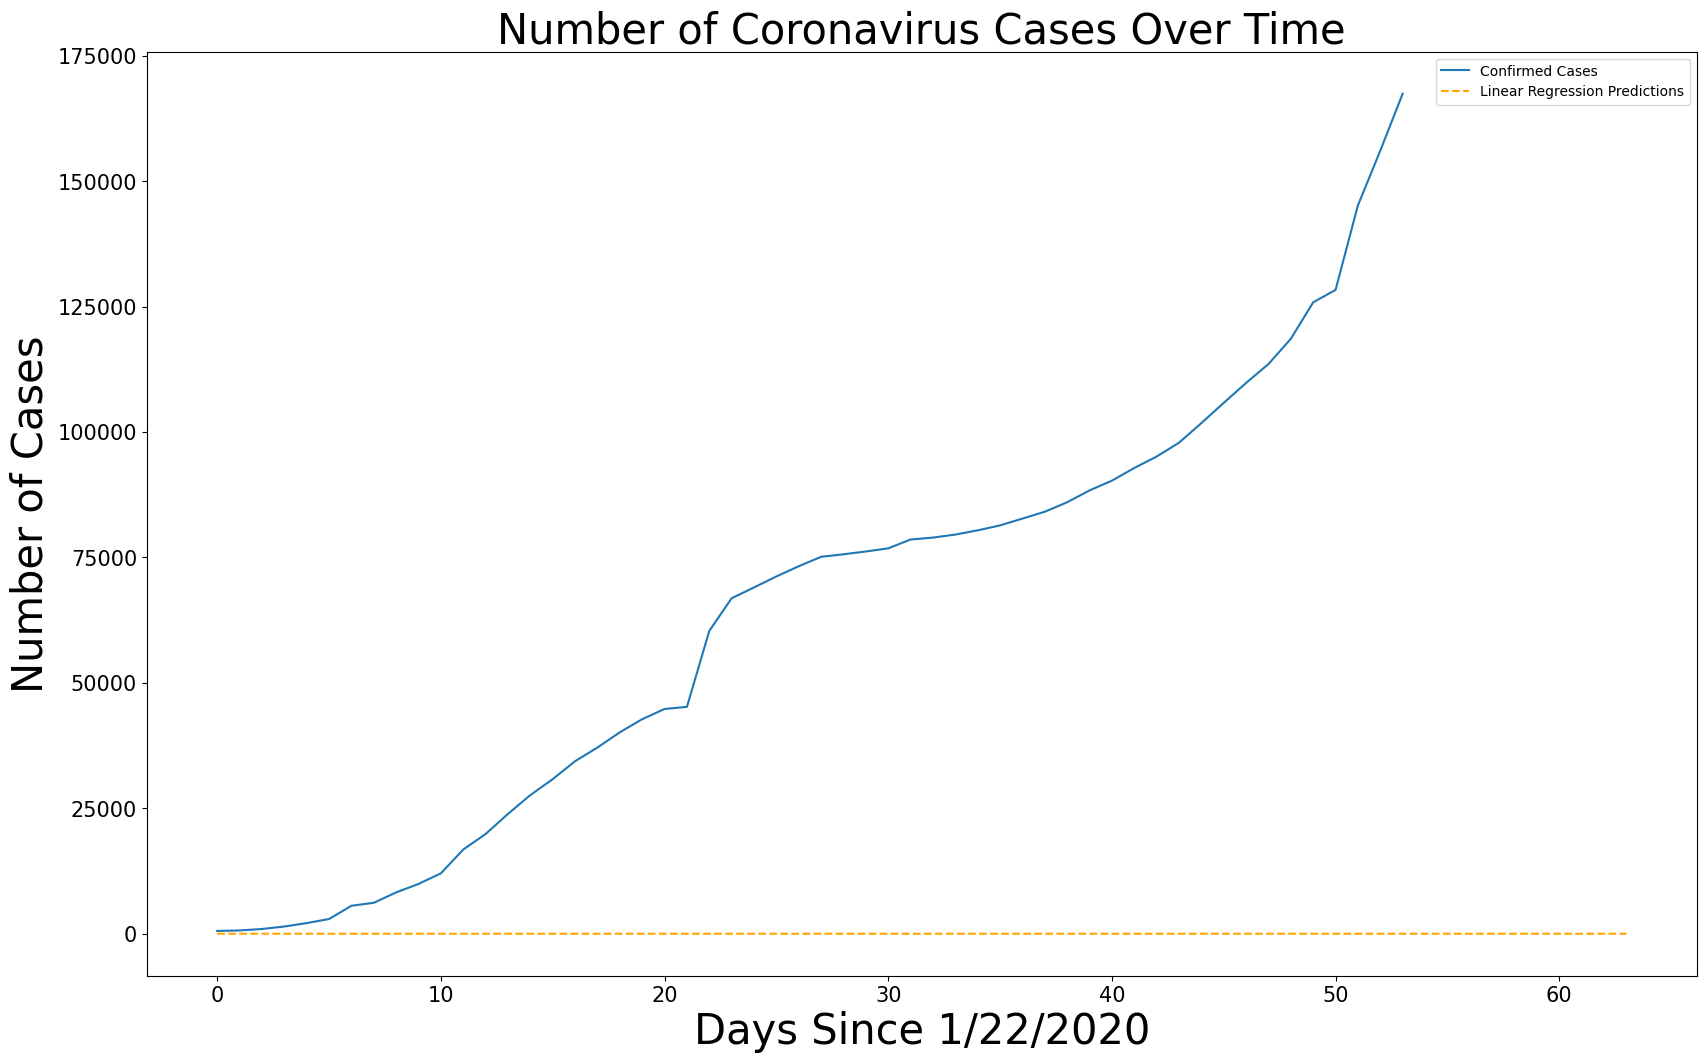

In [37]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [38]:
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[1.08620827]
 [1.12541507]
 [1.16462186]
 [1.20382866]
 [1.24303546]
 [1.28224225]
 [1.32144905]
 [1.36065585]
 [1.39986264]
 [1.43906944]]


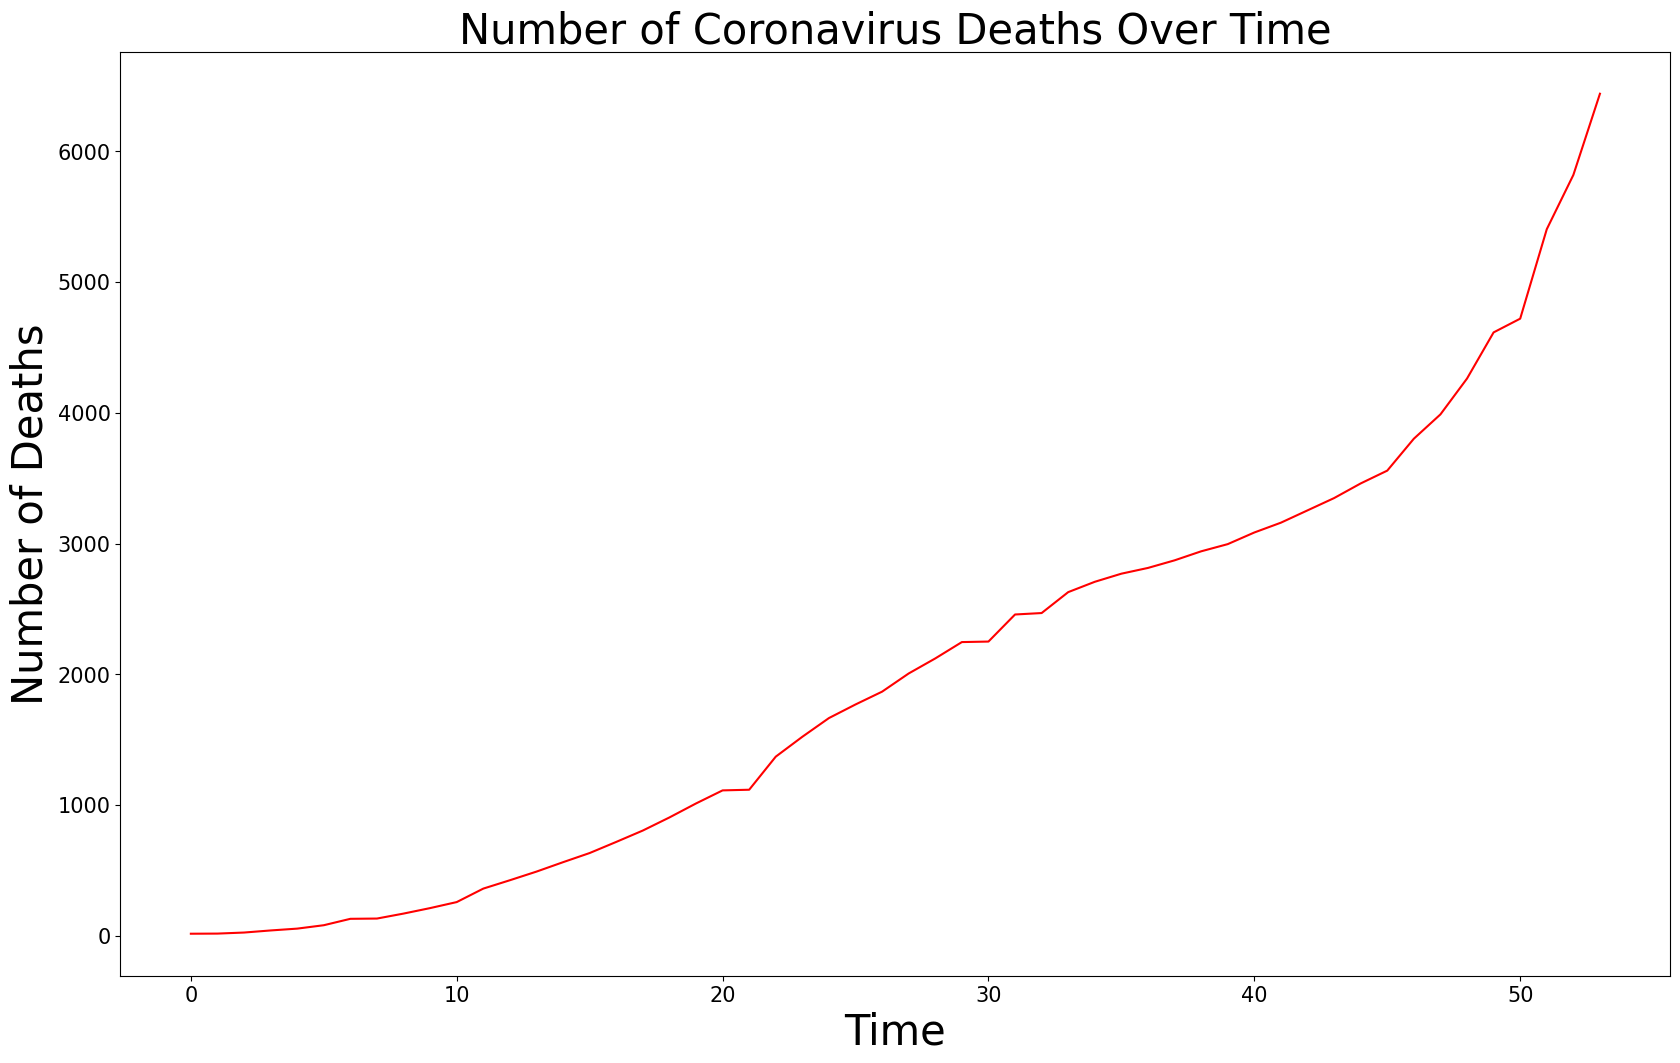

In [39]:
# Total deaths over time

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

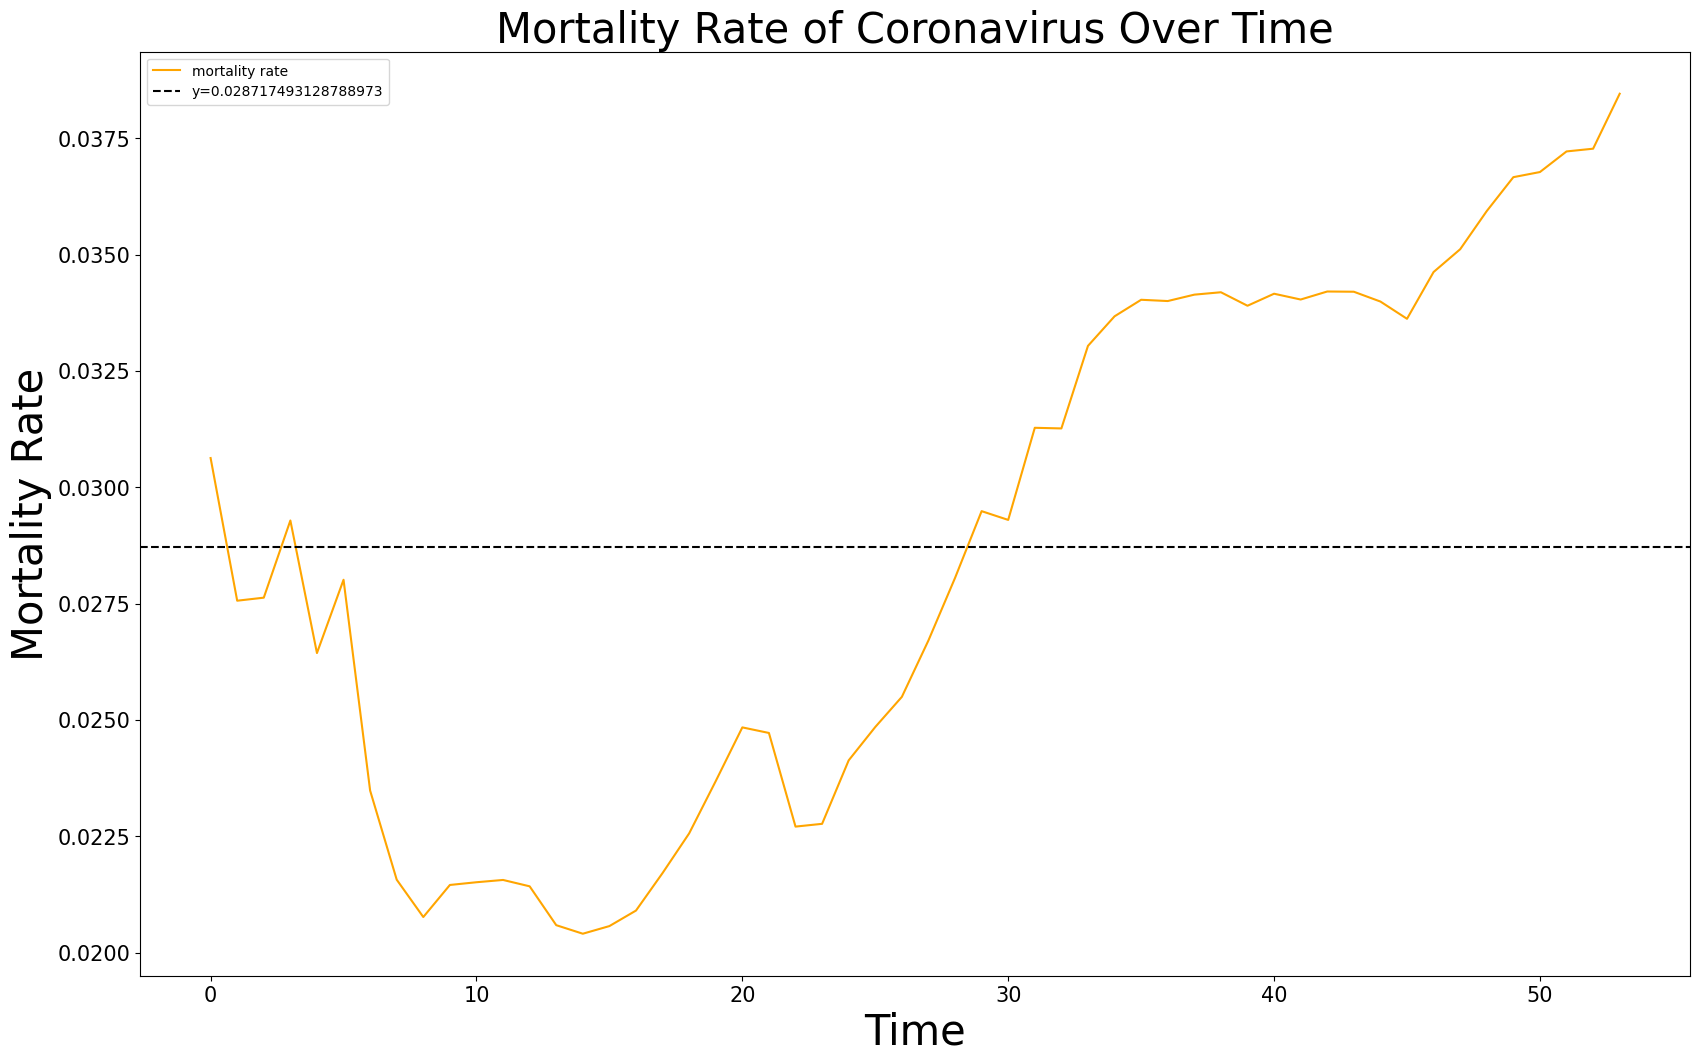

In [40]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

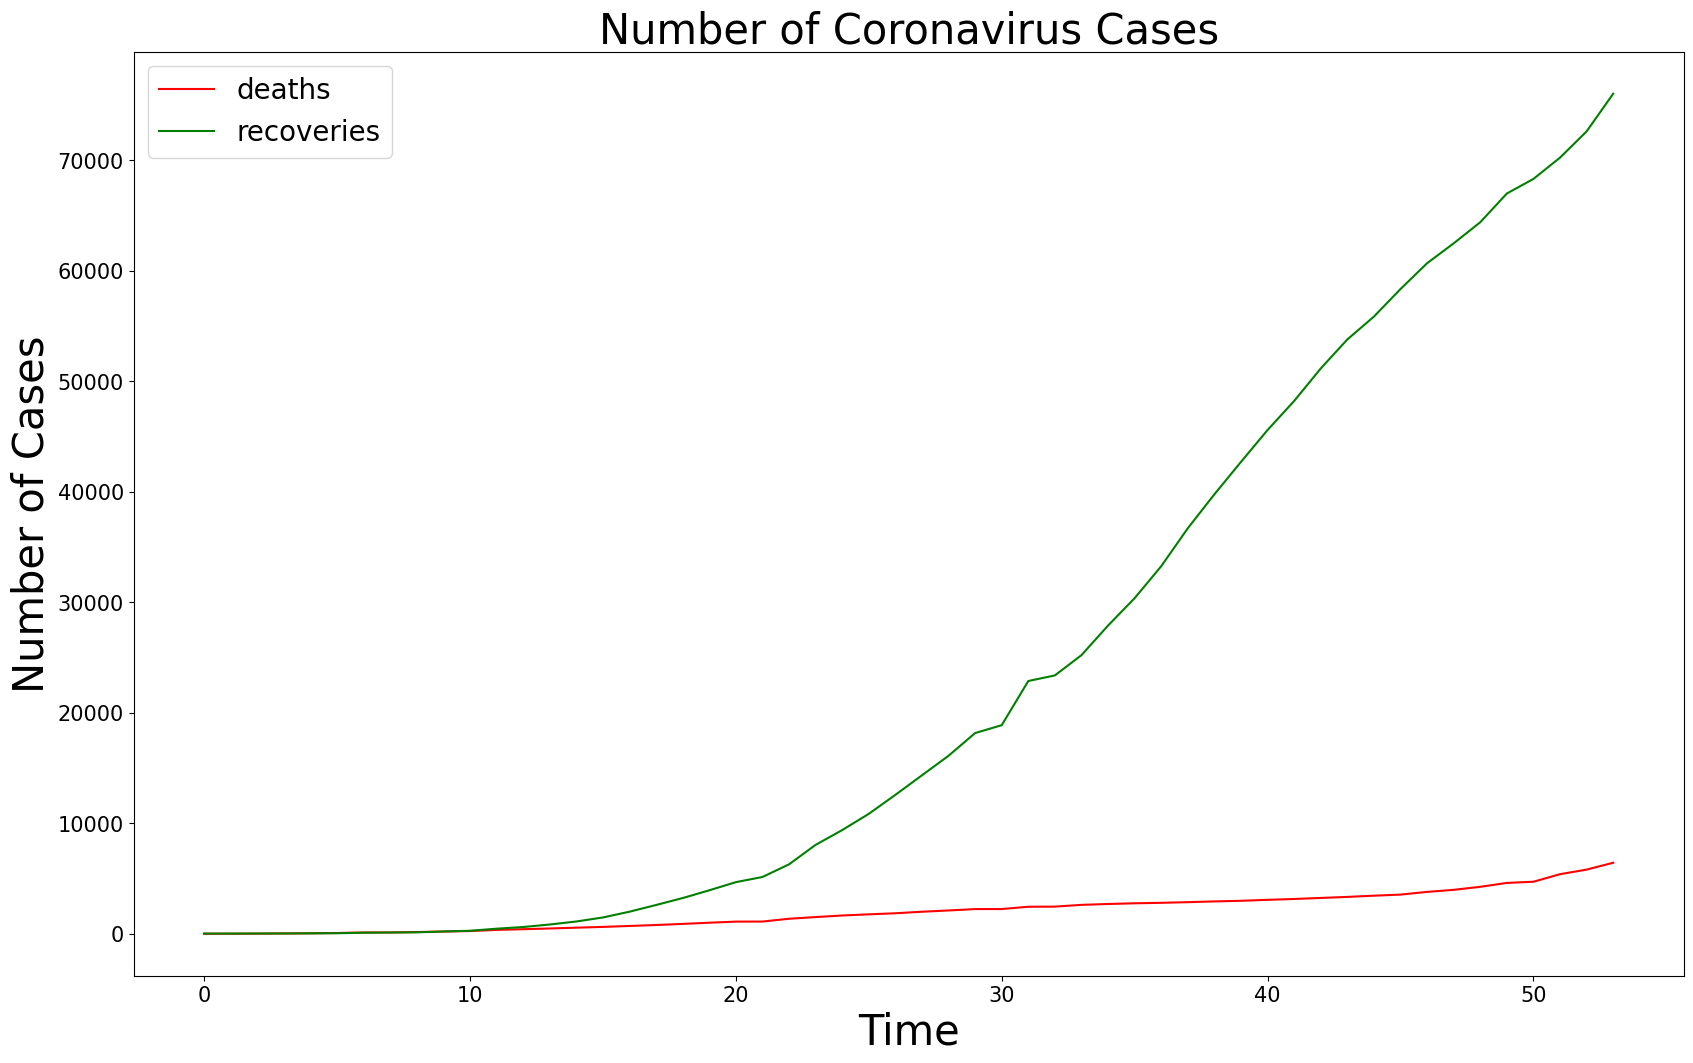

In [41]:
# Number of Coronavirus cases recovered vs the number of deaths

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

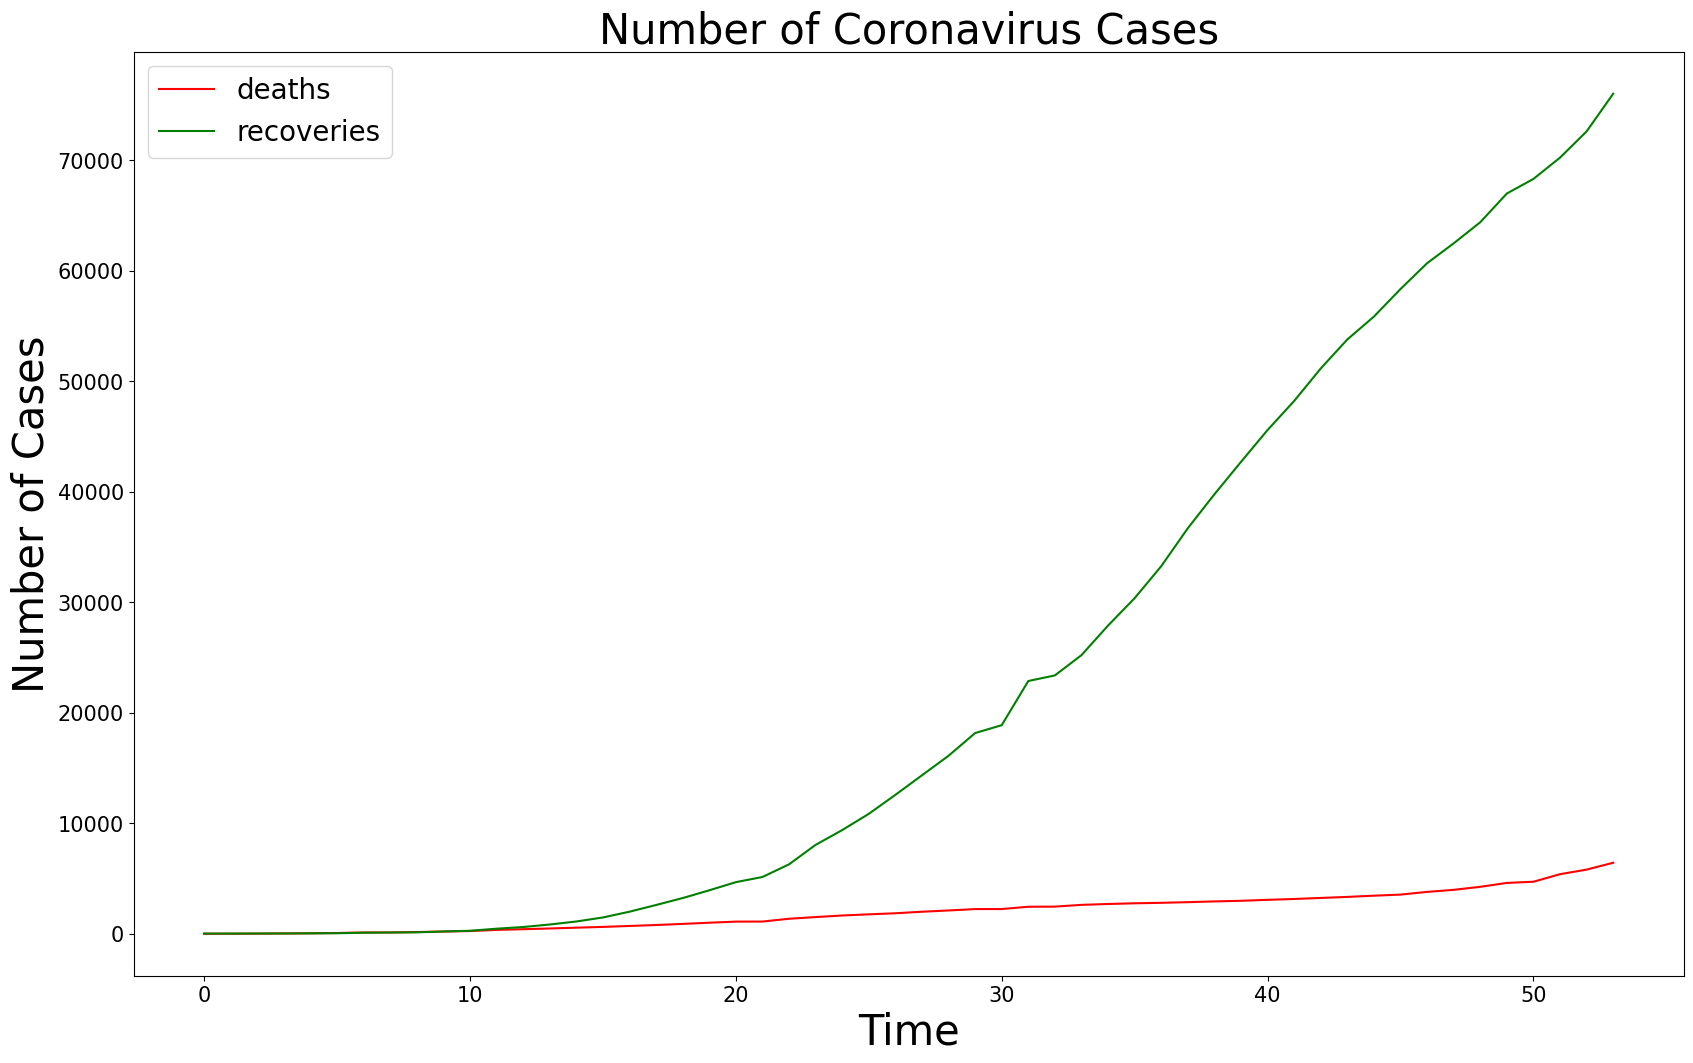

In [42]:
# Number of Coronavirus cases recovered vs the number of deaths

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['deaths', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

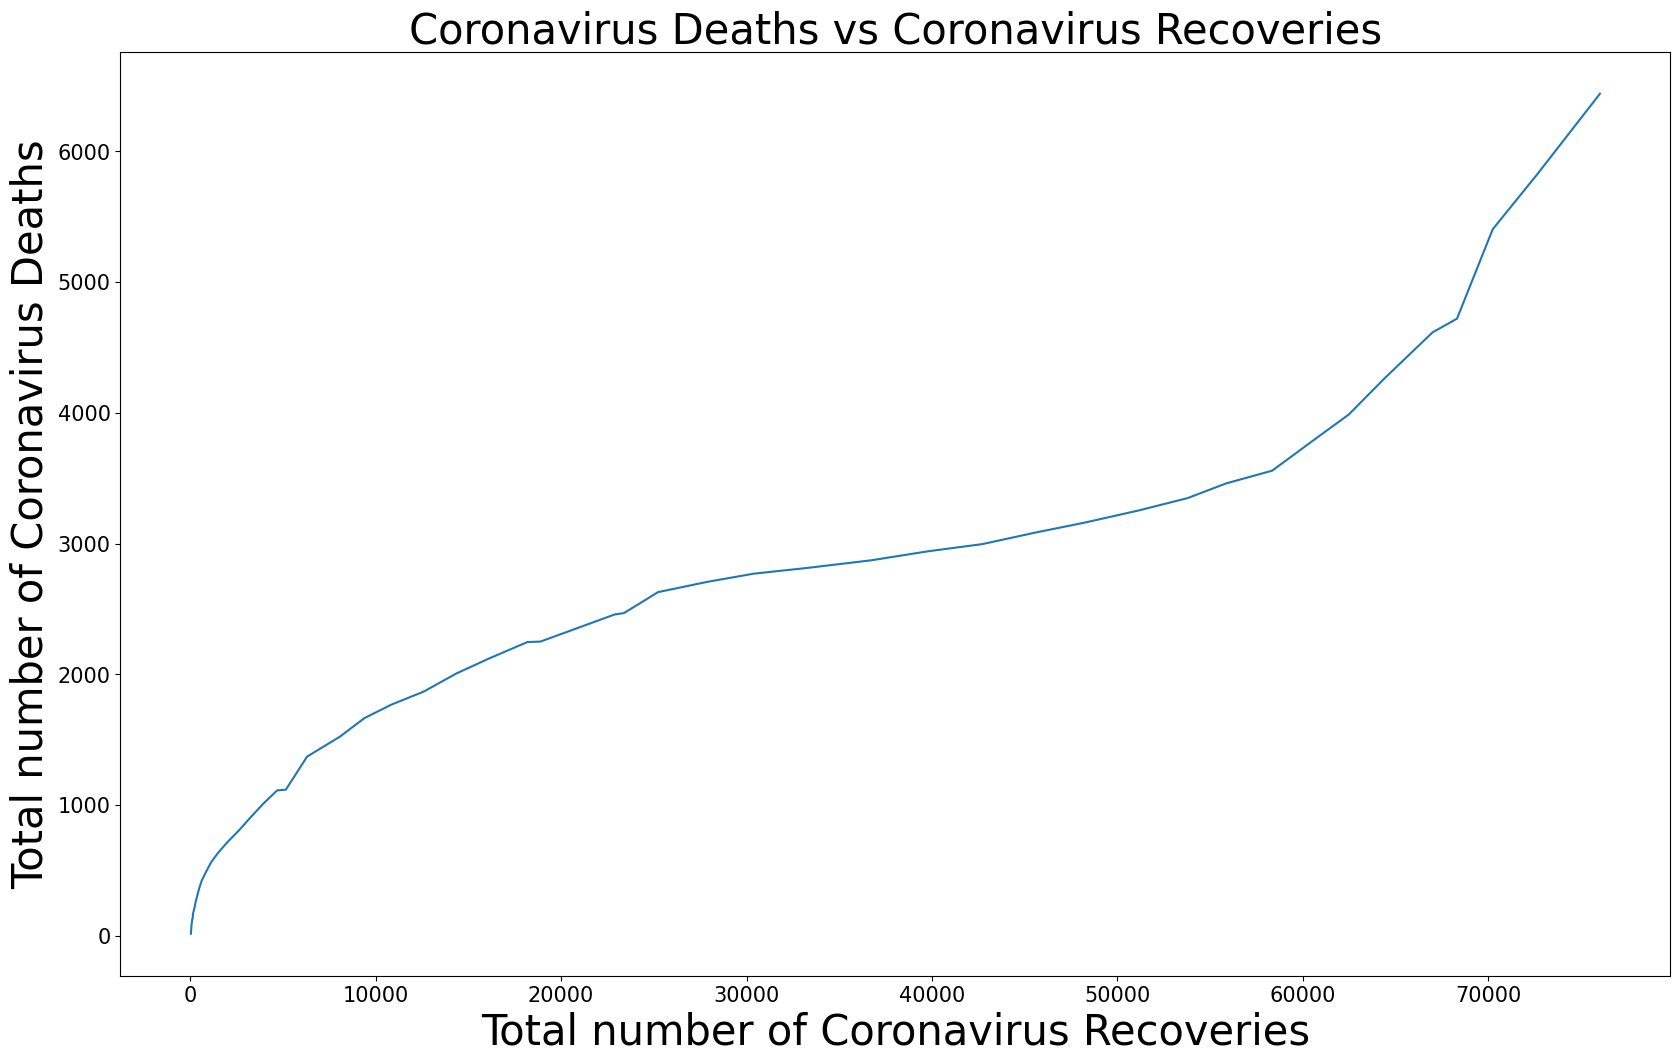

In [43]:
# Coronavirus Deaths vs Recoveries

plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Coronavirus Deaths vs Coronavirus Recoveries', size=30)
plt.xlabel('Total number of Coronavirus Recoveries', size=30)
plt.ylabel('Total number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()